### Libraries

In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn import preprocessing

# dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('max_columns', None)

#### Mappers

In [3]:
mapper = {'Austria':'AT', 'Belgium':'BE', 'Bulgaria':'BG', 'Croatia':'HR', 'Cyprus':'CY', 'Czechia':'CZ',
          'Denmark':'DK', 'Estonia':'EE', 'Finland':'FI', 'France':'FR', 'Germany':'DE', 'Greece':'EL',
          'Hungary':'HU', 'Ireland':'IE', 'Italy':'IT', 'Latvia':'LV', 'Lithuania':'LT', 'Luxembourg':'LU',
          'Malta':'MT', 'Netherlands':'NE', 'Poland':'PL', 'Portugal':'PT', 'Romania':'RO',
          'Slovakia':'SK', 'Slovenia':'SI', 'Spain':'ES', 'Sweden':'SE'}
mapper2 = {'Austria':1, 'Belgium':1, 'Bulgaria':2, 'Croatia':2, 'Cyprus':1, 'Czech Republic':2,
          'Denmark':2, 'Estonia':1, 'Finland':1, 'France':1, 'Germany':1, 'Greece':1,
          'Hungary':2, 'Ireland':1, 'Italy':1, 'Latvia':1, 'Lithuania':1, 'Luxembourg':1,
          'Malta':1, 'Netherlands':1, 'Poland':2, 'Portugal':1, 'Romania':2,
          'Slovak Republic':1, 'Slovenia':1, 'Spain':1, 'Sweden':2}

In [4]:
index_val = mapper.keys()
index_val

dict_keys(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'])

In [45]:
c_lib = {'Org. EA': ['Austria', 'Belgium', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Spain'],
         'Org. nonEA': ['Austria', 'Belgium', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Spain','Sweden', 'Denmark'],
         '2004': ['Cyprus', 'Estonia', 'Latvia', 'Lithuania', 'Malta', 'Slovakia', 'Slovenia', 'Czechia', 'Hungary', 'Poland'],
         '2004 EA': ['Cyprus', 'Estonia', 'Latvia', 'Lithuania', 'Malta', 'Slovakia', 'Slovenia'],
         'EA': ['Austria', 'Belgium', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Spain', 'Cyprus', 'Estonia', 'Latvia', 'Lithuania', 'Malta', 'Slovakia', 'Slovenia'],
         'All': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']}

In [46]:
len(c_lib['EA'])

19

# Data Transformation

#### Import

In [17]:
df_income_1q = pd.read_excel(io='Research02_Input01.xlsx', sheet_name='First', header=0, index_col=0)
df_income_2q = pd.read_excel(io='Research02_Input01.xlsx', sheet_name='Second', header=0, index_col=0)
df_income_3q = pd.read_excel(io='Research02_Input01.xlsx', sheet_name='Third', header=0, index_col=0)

df_gini = pd.read_excel(io='Research02_Input02.xls', sheet_name='Table', header=0, index_col=0)

In [18]:
mean_income_1q = np.nanmean(df_income_1q['2020'].values/df_income_1q['2019'].values)
mean_income_2q = np.nanmean(df_income_2q['2020'].values/df_income_2q['2019'].values)
mean_income_3q = np.nanmean(df_income_3q['2020'].values/df_income_3q['2019'].values)

mean_gini = np.nanmean(df_gini['2020'].values/df_gini['2019'].values)

In [19]:
df_income_1q = df_income_1q.loc[index_val,'2010':]
df_income_1q['2020'] = df_income_1q['2020'].fillna(round(df_income_1q['2019']*mean_income_1q,0))

# df_income_1q

In [20]:
df_income_2q = df_income_2q.loc[index_val,'2010':]
df_income_2q['2020'] = df_income_2q['2020'].fillna(round(df_income_2q['2019']*mean_income_2q,0))

# df_income_2q

In [21]:
df_income_3q = df_income_3q.loc[index_val,'2010':]
df_income_3q['2020'] = df_income_3q['2020'].fillna(round(df_income_3q['2019']*mean_income_3q,0))

# df_income_3q

In [22]:
df_gini = df_gini.loc[index_val,'2010':]

df_gini['2020'] = df_gini['2020'].fillna(round(df_gini['2019']*mean_gini,0))

# df_gini

In [23]:
pieces = {"income_1Q": df_income_1q.T, "Income_2Q": df_income_2q.T, "income_3Q": df_income_3q.T, "gini":df_gini.T}

df_cluster = pd.concat(pieces).T

df_cluster

income_1Q                                                        \
                 2011     2012     2013     2014     2015     2016     2017   
Austria       14940.0  15169.0  15466.0  16229.0  16149.0  16784.0  17211.0   
Belgium       12905.0  13037.0  13847.0  13747.0  14173.0  15018.0  14529.0   
Bulgaria       3702.0   3704.0   3892.0   4412.0   4470.0   4240.0   4733.0   
Croatia        4921.0   4859.0   5067.0   5212.0   5550.0   6101.0   6313.0   
Cyprus        13734.0  13612.0  12003.0  11141.0  10640.0  11323.0  11842.0   
Czechia        7864.0   8125.0   8574.0   8746.0   9102.0   9692.0   9824.0   
Denmark       14322.0  14361.0  14842.0  15002.0  15213.0  15945.0  15707.0   
Estonia        5137.0   5316.0   5845.0   5923.0   6777.0   7703.0   8070.0   
Finland       13137.0  13638.0  14339.0  14023.0  14395.0  15006.0  14889.0   
France        13368.0  13865.0  14169.0  14122.0  14710.0  15370.0  15103.0   
Germany       13219.0  13769.0  14039.0  13792.0  14385.0  14967.0  15222.0   
Greece         7596.0   6288.0   5673.0   5634.0   5763.0   5947.0   6166.0   
Hungary        5234.0   5586.0   5354.0   5492.0   5748.0   6031.0   6077.0   
Ireland       12001.0  11644.0  11795.0  11673.0  12250.0  12689.0  12826.0   
Italy         10593.0  10358.0  10274.0  10352.0  10310.0  10693.0  10994.0   
Latvia         4062.0   4030.0   4270.0   4710.0   5110.0   5947.0   5859.0   
Lithuania      4056.0   4512.0   4812.0   5138.0   5271.0   5988.0   6098.0   
Luxembourg    19182.0  18699.0  19401.0  19951.0  20769.0  20241.0  20823.0   
Malta         10001.0  10282.0  10633.0  10909.0  11565.0  11964.0  12667.0   
Netherlands   14342.0  14582.0  14702.0  14231.0  14594.0  15732.0  15613.0   
Poland         5765.0   6057.0   6432.0   6719.0   6977.0   7591.0   8156.0   
Portugal       6679.0   6867.0   6791.0   6812.0   6978.0   7359.0   7525.0   
Romania        2336.0   2351.0   2442.0   2394.0   2581.0   2794.0   3332.0   
Slovakia       6897.0   7287.0   7384.0   7583.0   7814.0   7934.0   7390.0   
Slovenia      10569.0  10774.0  10566.0  10681.0  11260.0  11345.0  11383.0   
Spain          9419.0   9290.0   9371.0   9129.0   9286.0   9875.0  10014.0   
Sweden        12861.0  13519.0  14392.0  13997.0  14171.0  14778.0  14290.0   

                                       Income_2Q                             \
                2018     2019     2020      2011     2012     2013     2014   
Austria      17044.0  17462.0  17428.0   20425.0  20602.0  20904.0  21880.0   
Belgium      14797.0  15681.0  15888.0   18159.0  18396.0  19563.0  19591.0   
Bulgaria      4601.0   5275.0   5350.0    5831.0   5697.0   5900.0   6754.0   
Croatia       6719.0   7384.0   7678.0    7423.0   7362.0   7414.0   7740.0   
Cyprus       12129.0  13111.0  13151.0   19162.0  19074.0  16978.0  15762.0   
Czechia      10221.0  10781.0  10914.0    9989.0  10313.0  10802.0  11091.0   
Denmark      16223.0  16818.0  16351.0   19184.0  19228.0  19743.0  20046.0   
Estonia       8481.0   9106.0   9291.0    7485.0   7891.0   8607.0   9241.0   
Finland      14917.0  15139.0  14857.0   17933.0  18576.0  19178.0  19250.0   
France       15091.0  15303.0  14158.0   18161.0  18784.0  19193.0  19307.0   
Germany      15736.0  16385.0  15092.0   18395.0  19208.0  19478.0  19216.0   
Greece        6317.0   6792.0   7043.0   11627.0  10063.0   9046.0   8674.0   
Hungary       6235.0   6898.0   7035.0    7135.0   7604.0   7277.0   7559.0   
Ireland      13786.0  14436.0  14709.0   16628.0  16520.0  16732.0  16567.0   
Italy        11036.0  11387.0  11602.0   15776.0  15495.0  15315.0  15254.0   
Latvia        6288.0   6973.0   7339.0    5944.0   6101.0   6446.0   7320.0   
Lithuania     6705.0   7496.0   8182.0    6068.0   6724.0   7282.0   7595.0   
Luxembourg   19466.0  20201.0  19414.0   26601.0  26579.0  28030.0  28271.0   
Malta        12495.0  12848.0  13400.0   14029.0  14600.0  15249.0  15686.0   
Netherlands  15879.0  16242.0  16346.0   18833.0  18978.0  19

#### Statistics

In [24]:
df_cluster.mean().to_frame().T.rename(index={0:'mean'})\
.append(df_cluster.std().to_frame().T.rename(index={0:'std'}))\
.T.stack().unstack(level=1)\
.to_excel('descriptive_stats.xlsx')

###  Cluster analysis

In [25]:
df_cluster_norm =(df_cluster - df_cluster.mean())/df_cluster.std()

# df_cluster_norm

In [26]:
df = df_cluster_norm.copy()
df.columns = df.columns.map('_'.join).str.strip('|')

df

,income_1Q_2011,income_1Q_2012,income_1Q_2013,income_1Q_2014,income_1Q_2015,income_1Q_2016,income_1Q_2017,income_1Q_2018,income_1Q_2019,income_1Q_2020,Income_2Q_2011,Income_2Q_2012,Income_2Q_2013,Income_2Q_2014,Income_2Q_2015,Income_2Q_2016,Income_2Q_2017,Income_2Q_2018,Income_2Q_2019,Income_2Q_2020,income_3Q_2011,income_3Q_2012,income_3Q_2013,income_3Q_2014,income_3Q_2015,income_3Q_2016,income_3Q_2017,income_3Q_2018,income_3Q_2019,income_3Q_2020,gini_2010,gini_2011,gini_2012,gini_2013,gini_2014,gini_2015,gini_2016,gini_2017,gini_2018,gini_2019,gini_2020
Austria,1.222135,1.246579,1.244679,1.421911,1.314659,1.340190,1.424693,1.389045,1.375838,1.449060,1.196984,1.186562,1.166227,1.333706,1.252409,1.328308,1.347939,1.321592,1.304712,1.289707,1.151952,1.153884,1.111381,1.235991,1.203730,1.238347,1.287799,1.247988,1.231170,1.220324,-0.347559,-0.615189,-0.564316,-0.778029,-0.732988,-0.735721,-0.766298,-0.498498,-0.678370,-0.535147,-0.622430
Belgium,0.757550,0.761668,0.884850,0.862804,0.876319,0.950802,0.825024,0.868301,0.959261,1.063411,0.810996,0.812627,0.945288,0.947673,0.909068,1.037197,0.936670,0.998637,1.023584,1.095852,0.723831,0.726901,0.878969,0.891276,0.868989,1.023202,0.812940,0.850315,0.814801,0.861485,-0.808627,-0.930752,-0.874117,-1.069056,-1.180384,-0.971361,-1.000820,-0.941404,-0.937003,-1.126914,-1.014969
Bulgaria,-1.343471,-1.361068,-1.327687,-1.240039,-1.276118,-1.425659,-1.365268,-1.494629,-1.474709,-1.575532,-1.288942,-1.339954,-1.305782,-1.217252,-1.264144,-1.409911,-1.301455,-1.467583,-1.408426,-1.447947,-1.279619,-1.363966,-1.306535,-1.221991,-1.246882,-1.378943,-1.221000,-1.388555,-1.303502,-1.306400,0.981402,1.565065,1.125503,1.444352,1.319769,1.573553,1.969792,2.528030,2.331188,2.744226,2.566954
Croatia,-1.065177,-1.098370,-1.066539,-1.059827,-1.036539,-1.015324,-1.011995,-1.003781,-0.981413,-0.992551,-1.017763,-1.057723,-1.056341,-1.050966,-1.035639,-1.033781,-0.981580,-1.004873,-0.989835,-0.992572,-1.026464,-1.074118,-1.019070,-1.059989,-1.064111,-1.058145,-1.000999,-1.012266,-1.012514,-1.012249,0.547455,0.474938,0.365084,0.253790,-0.048736,0.018328,-0.088790,-0.006379,0.003483,-0.115979,-0.303491
Cyprus,0.946809,0.892449,0.475014,0.275765,0.092586,0.136084,0.224236,0.249990,0.358137,0.378007,0.981846,0.927554,0.519392,0.301922,0.141052,0.171579,0.262605,0.327253,0.401809,0.352303,1.020311,1.038583,0.655648,0.471469,0.278546,0.313175,0.337070,0.314772,0.391167,0.358556,0.140631,-0.098813,0.393248,0.650644,1.161864,0.772376,0.510544,0.215074,-0.137590,0.352503,-0.058154
Czechia,-0.393297,-0.355537,-0.287094,-0.263743,-0.248592,-0.223538,-0.226969,-0.192190,-0.186852,-0.182186,-0.580673,-0.557505,-0.498145,-0.485829,-0.469127,-0.448038,-0.446445,-0.412701,-0.405083,-0.422002,-0.675892,-0.675991,-0.602570,-0.629382,-0.596109,-0.588205,-0.570089,-0.542205,-0.534934,-0.500297,-1.269695,-1.246315,-1.324735,-1.412996,-1.390923,-1.254129,-1.313516,-1.335099,-1.336710,-1.398140,-1.309374
Denmark,1.081048,1.062805,1.105993,1.145511,1.107024,1.155197,1.088413,1.198777,1.225206,1.179356,0.985594,0.953658,0.974945,1.024407,0.986237,1.040551,0.945207,1.049758,1.071590,1.003024,0.840988,0.793425,0.826408,0.888481,0.852952,0.916398,0.798542,0.938377,0.982021,0.835110,-0.727262,-0.844689,-0.874117,-0.830943,-0.706671,-0.688593,-0.636008,-0.572315,-0.443248,-0.535147,-0.548828
Estonia,-1.015864,-0.994428,-0.893625,-0.899664,-0.764351,-0.662096,-0.619147,-0.595436,-0.578636,-0.588621,-1.007202,-0.968054,-0.859786,-0.797827,-0.672465,-0.550497,-0.484442,-0.392810,-0.368768,-0.388450,-0.954555,-0.853603,-0.753278,-0.623918,-0.513251,-0.364363,-0.336321,-0.237906,-0.256458,-0.287076,0.466091,0.675751,0.815703,0.782929,1.372404,1.055144,0.666892,0.411921,0.215093,0.204561,0.236251
Finland,0.810515,0.898362,0.994199,0.924977,0.925565,0.948156,0.905516,0.896111,0.832487,0.805226,0.772500,0.843139,0.881857,0.890164,0.827233,0.812827,0.756395,0.770945,0.715708,0.722306,0.689223,0.749373,0.818312,0.760658,0.726819,0.711103,0.634110,

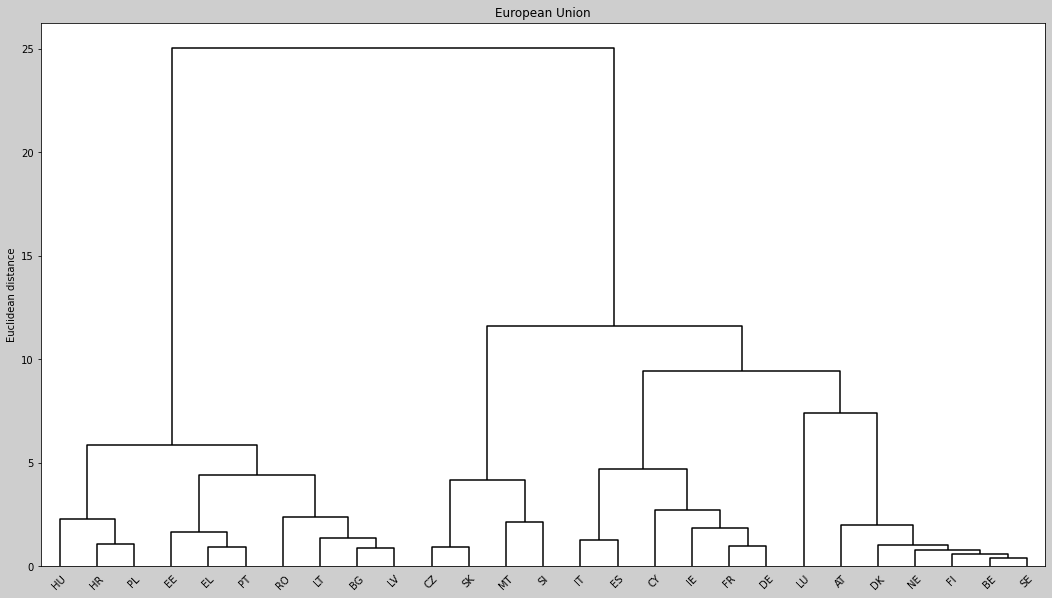

In [84]:
plt.figure(figsize=(18,10), facecolor='#cecece')

labelList = list(df.index.map(mapper))

linked = linkage(df, 'ward')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True, color_threshold=0, above_threshold_color='k')
plt.title(f'European Union')
plt.ylabel('Euclidean distance')

'''
save_fig_name = title.replace(' ','_')
plt.savefig(f'{save_fig_name}.png', facecolor='#cecece')
'''

plt.show()

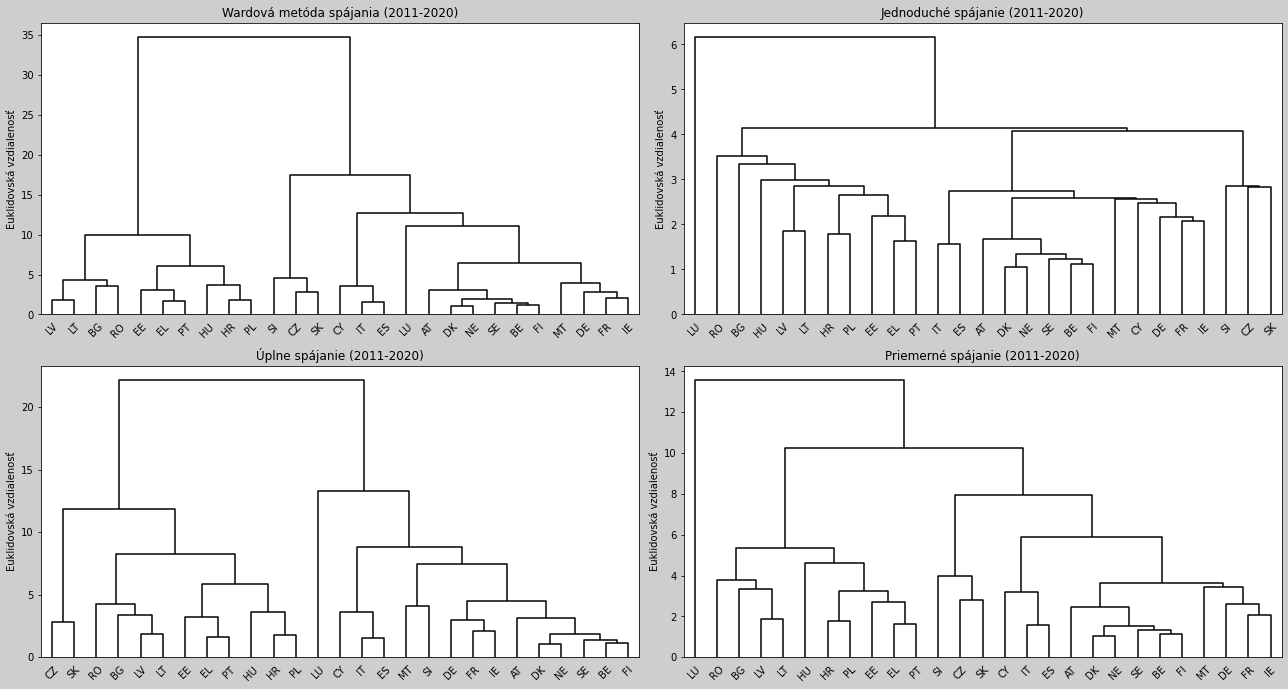

In [28]:
plt.figure(4, figsize=(18,10), facecolor='#cecece')

labelList = list(df.index.map(mapper))

plt.subplot(2, 2, 1)
linked = linkage(df, 'ward')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Wardová metóda spájania (2011-2020)')
plt.ylabel('Euklidovská vzdialenosť')

plt.subplot(2, 2, 2)
linked = linkage(df, 'single')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Jednoduché spájanie (2011-2020)')
plt.ylabel('Euklidovská vzdialenosť')

plt.subplot(2, 2, 3)
linked = linkage(df, 'complete')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Úplne spájanie (2011-2020)')
plt.ylabel('Euklidovská vzdialenosť')

plt.subplot(2, 2, 4)
linked = linkage(df, 'average')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Priemerné spájanie (2011-2020)')
plt.ylabel('Euklidovská vzdialenosť')

'''
plt.subplot(3, 2, 5)
linked = linkage(df, 'average')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Average method linkage')

plt.subplot(3, 2, 6)
linked = linkage(df, 'centroid')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Centroid method linkage')
'''

plt.tight_layout()
plt.subplots_adjust(top=0.93)
# plt.suptitle('Original EU members over time 1980-1999 HAC analysis different methods', size='xx-large')
plt.savefig('Linkage_methods_income_heterogeneity.png', facecolor='#cecece')
plt.show()

## Window perspective - EU

In [86]:
df_cluster_EU = df_cluster.copy()
df_cluster_EU

income_1Q                                                        \
                 2011     2012     2013     2014     2015     2016     2017   
Austria       14940.0  15169.0  15466.0  16229.0  16149.0  16784.0  17211.0   
Belgium       12905.0  13037.0  13847.0  13747.0  14173.0  15018.0  14529.0   
Bulgaria       3702.0   3704.0   3892.0   4412.0   4470.0   4240.0   4733.0   
Croatia        4921.0   4859.0   5067.0   5212.0   5550.0   6101.0   6313.0   
Cyprus        13734.0  13612.0  12003.0  11141.0  10640.0  11323.0  11842.0   
Czechia        7864.0   8125.0   8574.0   8746.0   9102.0   9692.0   9824.0   
Denmark       14322.0  14361.0  14842.0  15002.0  15213.0  15945.0  15707.0   
Estonia        5137.0   5316.0   5845.0   5923.0   6777.0   7703.0   8070.0   
Finland       13137.0  13638.0  14339.0  14023.0  14395.0  15006.0  14889.0   
France        13368.0  13865.0  14169.0  14122.0  14710.0  15370.0  15103.0   
Germany       13219.0  13769.0  14039.0  13792.0  14385.0  14967.0  15222.0   
Greece         7596.0   6288.0   5673.0   5634.0   5763.0   5947.0   6166.0   
Hungary        5234.0   5586.0   5354.0   5492.0   5748.0   6031.0   6077.0   
Ireland       12001.0  11644.0  11795.0  11673.0  12250.0  12689.0  12826.0   
Italy         10593.0  10358.0  10274.0  10352.0  10310.0  10693.0  10994.0   
Latvia         4062.0   4030.0   4270.0   4710.0   5110.0   5947.0   5859.0   
Lithuania      4056.0   4512.0   4812.0   5138.0   5271.0   5988.0   6098.0   
Luxembourg    19182.0  18699.0  19401.0  19951.0  20769.0  20241.0  20823.0   
Malta         10001.0  10282.0  10633.0  10909.0  11565.0  11964.0  12667.0   
Netherlands   14342.0  14582.0  14702.0  14231.0  14594.0  15732.0  15613.0   
Poland         5765.0   6057.0   6432.0   6719.0   6977.0   7591.0   8156.0   
Portugal       6679.0   6867.0   6791.0   6812.0   6978.0   7359.0   7525.0   
Romania        2336.0   2351.0   2442.0   2394.0   2581.0   2794.0   3332.0   
Slovakia       6897.0   7287.0   7384.0   7583.0   7814.0   7934.0   7390.0   
Slovenia      10569.0  10774.0  10566.0  10681.0  11260.0  11345.0  11383.0   
Spain          9419.0   9290.0   9371.0   9129.0   9286.0   9875.0  10014.0   
Sweden        12861.0  13519.0  14392.0  13997.0  14171.0  14778.0  14290.0   

                                       Income_2Q                             \
                2018     2019     2020      2011     2012     2013     2014   
Austria      17044.0  17462.0  17428.0   20425.0  20602.0  20904.0  21880.0   
Belgium      14797.0  15681.0  15888.0   18159.0  18396.0  19563.0  19591.0   
Bulgaria      4601.0   5275.0   5350.0    5831.0   5697.0   5900.0   6754.0   
Croatia       6719.0   7384.0   7678.0    7423.0   7362.0   7414.0   7740.0   
Cyprus       12129.0  13111.0  13151.0   19162.0  19074.0  16978.0  15762.0   
Czechia      10221.0  10781.0  10914.0    9989.0  10313.0  10802.0  11091.0   
Denmark      16223.0  16818.0  16351.0   19184.0  19228.0  19743.0  20046.0   
Estonia       8481.0   9106.0   9291.0    7485.0   7891.0   8607.0   9241.0   
Finland      14917.0  15139.0  14857.0   17933.0  18576.0  19178.0  19250.0   
France       15091.0  15303.0  14158.0   18161.0  18784.0  19193.0  19307.0   
Germany      15736.0  16385.0  15092.0   18395.0  19208.0  19478.0  19216.0   
Greece        6317.0   6792.0   7043.0   11627.0  10063.0   9046.0   8674.0   
Hungary       6235.0   6898.0   7035.0    7135.0   7604.0   7277.0   7559.0   
Ireland      13786.0  14436.0  14709.0   16628.0  16520.0  16732.0  16567.0   
Italy        11036.0  11387.0  11602.0   15776.0  15495.0  15315.0  15254.0   
Latvia        6288.0   6973.0   7339.0    5944.0   6101.0   6446.0   7320.0   
Lithuania     6705.0   7496.0   8182.0    6068.0   6724.0   7282.0   7595.0   
Luxembourg   19466.0  20201.0  19414.0   26601.0  26579.0  28030.0  28271.0   
Malta        12495.0  12848.0  13400.0   14029.0  14600.0  15249.0  15686.0   
Netherlands  15879.0  16242.0  16346.0   18833.0  18978.0  19

In [87]:
df_cluster_2011 = df_cluster_EU.loc[:,pd.IndexSlice[:, ['2011','2012','2013','2014','2015']]]
df_cluster_2016 = df_cluster_EU.loc[:,pd.IndexSlice[:, ['2016','2017','2018','2019','2020']]]

df_cluster_norm_2011 =(df_cluster_2011 - df_cluster_2011.mean())/df_cluster_2011.std()
df_cluster_norm_2016 =(df_cluster_2016 - df_cluster_2016.mean())/df_cluster_2016.std()

In [88]:
df_2011 = df_cluster_norm_2011.copy()
df_2011.columns = df_2011.columns.map('_'.join).str.strip('|')

df_2016 = df_cluster_norm_2016.copy()
df_2016.columns = df_2016.columns.map('_'.join).str.strip('|')

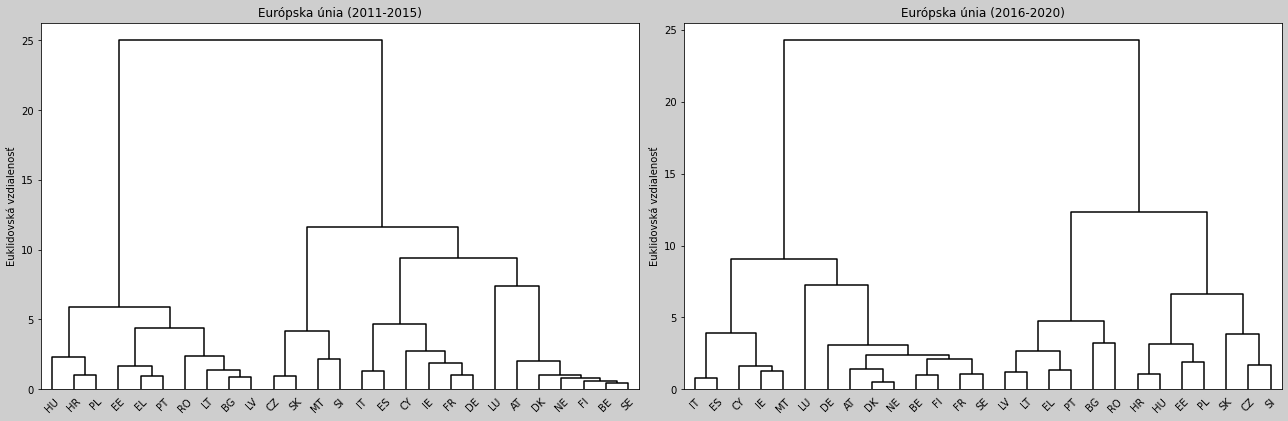

In [89]:
plt.figure(4, figsize=(18,6), facecolor='#cecece')

labelList = list(df_2011.index.map(mapper))

plt.subplot(1, 2, 1)
linked = linkage(df_2011, 'ward')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Európska únia (2011-2015)')
plt.ylabel('Euklidovská vzdialenosť')

plt.subplot(1, 2, 2)
linked = linkage(df_2016, 'ward')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Európska únia (2016-2020)')
plt.ylabel('Euklidovská vzdialenosť')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
# plt.suptitle('Original EU members over time 1980-1999 HAC analysis different methods', size='xx-large')
plt.savefig('EU_cluster_window_approach.png', facecolor='#cecece')
plt.show()

## Window perspective - EA

In [76]:
df_cluster_EA = df_cluster.loc[c_lib['EA'],:]

df_cluster_EA

income_1Q                                                        \
                 2011     2012     2013     2014     2015     2016     2017   
Austria       14940.0  15169.0  15466.0  16229.0  16149.0  16784.0  17211.0   
Belgium       12905.0  13037.0  13847.0  13747.0  14173.0  15018.0  14529.0   
Finland       13137.0  13638.0  14339.0  14023.0  14395.0  15006.0  14889.0   
France        13368.0  13865.0  14169.0  14122.0  14710.0  15370.0  15103.0   
Germany       13219.0  13769.0  14039.0  13792.0  14385.0  14967.0  15222.0   
Greece         7596.0   6288.0   5673.0   5634.0   5763.0   5947.0   6166.0   
Ireland       12001.0  11644.0  11795.0  11673.0  12250.0  12689.0  12826.0   
Italy         10593.0  10358.0  10274.0  10352.0  10310.0  10693.0  10994.0   
Luxembourg    19182.0  18699.0  19401.0  19951.0  20769.0  20241.0  20823.0   
Netherlands   14342.0  14582.0  14702.0  14231.0  14594.0  15732.0  15613.0   
Portugal       6679.0   6867.0   6791.0   6812.0   6978.0   7359.0   7525.0   
Spain          9419.0   9290.0   9371.0   9129.0   9286.0   9875.0  10014.0   
Cyprus        13734.0  13612.0  12003.0  11141.0  10640.0  11323.0  11842.0   
Estonia        5137.0   5316.0   5845.0   5923.0   6777.0   7703.0   8070.0   
Latvia         4062.0   4030.0   4270.0   4710.0   5110.0   5947.0   5859.0   
Lithuania      4056.0   4512.0   4812.0   5138.0   5271.0   5988.0   6098.0   
Malta         10001.0  10282.0  10633.0  10909.0  11565.0  11964.0  12667.0   
Slovakia       6897.0   7287.0   7384.0   7583.0   7814.0   7934.0   7390.0   
Slovenia      10569.0  10774.0  10566.0  10681.0  11260.0  11345.0  11383.0   

                                       Income_2Q                             \
                2018     2019     2020      2011     2012     2013     2014   
Austria      17044.0  17462.0  17428.0   20425.0  20602.0  20904.0  21880.0   
Belgium      14797.0  15681.0  15888.0   18159.0  18396.0  19563.0  19591.0   
Finland      14917.0  15139.0  14857.0   17933.0  18576.0  19178.0  19250.0   
France       15091.0  15303.0  14158.0   18161.0  18784.0  19193.0  19307.0   
Germany      15736.0  16385.0  15092.0   18395.0  19208.0  19478.0  19216.0   
Greece        6317.0   6792.0   7043.0   11627.0  10063.0   9046.0   8674.0   
Ireland      13786.0  14436.0  14709.0   16628.0  16520.0  16732.0  16567.0   
Italy        11036.0  11387.0  11602.0   15776.0  15495.0  15315.0  15254.0   
Luxembourg   19466.0  20201.0  19414.0   26601.0  26579.0  28030.0  28271.0   
Netherlands  15879.0  16242.0  16346.0   18833.0  18978.0  19226.0  18805.0   
Portugal      7526.0   8103.0   8852.0    9621.0   9795.0   9820.0  10125.0   
Spain        10310.0  10571.0  10969.0   14424.0  14304.0  14250.0  14195.0   
Cyprus       12129.0  13111.0  13151.0   19162.0  19074.0  16978.0  15762.0   
Estonia       8481.0   9106.0   9291.0    7485.0   7891.0   8607.0   9241.0   
Latvia        6288.0   6973.0   7339.0    5944.0   6101.0   6446.0   7320.0   
Lithuania     6705.0   7496.0   8182.0    6068.0   6724.0   7282.0   7595.0   
Malta        12495.0  12848.0  13400.0   14029.0  14600.0  15249.0  15686.0   
Slovakia      7748.0   7934.0   7779.0    8975.0   9799.0   9572.0   9877.0   
Slovenia     11898.0  12592.0  12807.0   13940.0  14271.0  14212.0  14328.0   

                                                                  income_3Q  \
                2015     2016     2017     2018     2019     2020      2011   
Austria      21981.0  23071.0  23361.0  23204.0  23687.0  23334.0   27416.0   
Belgium      19921.0  21335.0  20904.0  21353.0  22100.0  22294.0   24076.0   
Finland      19430.0  19997.0  19827.0  20048.0  20362.0  20290.0   23806.0   
France       19885.0  20621.0  20357.0  20223.0  20471.0  19151.0   24818.0   
Germany      20365.0  21152.0  21331.0  21980.0  22693.0  21855.0   25362.0   
Greece        8802.0   9048.0   9035.0   9245.0   9765.0  10170.0   16733.0   
Ireland      17656.0  18397.0  18198.0  19464.0  19775.0  20

In [77]:
df_cluster_2011 = df_cluster_EA.loc[:,pd.IndexSlice[:, ['2011','2012','2013','2014','2015']]]
df_cluster_2016 = df_cluster_EA.loc[:,pd.IndexSlice[:, ['2016','2017','2018','2019','2020']]]

df_cluster_norm_2011 =(df_cluster_2011 - df_cluster_2011.mean())/df_cluster_2011.std()
df_cluster_norm_2016 =(df_cluster_2016 - df_cluster_2016.mean())/df_cluster_2016.std()

In [78]:
df_2011 = df_cluster_norm_2011.copy()
df_2011.columns = df_2011.columns.map('_'.join).str.strip('|')

df_2016 = df_cluster_norm_2016.copy()
df_2016.columns = df_2016.columns.map('_'.join).str.strip('|')

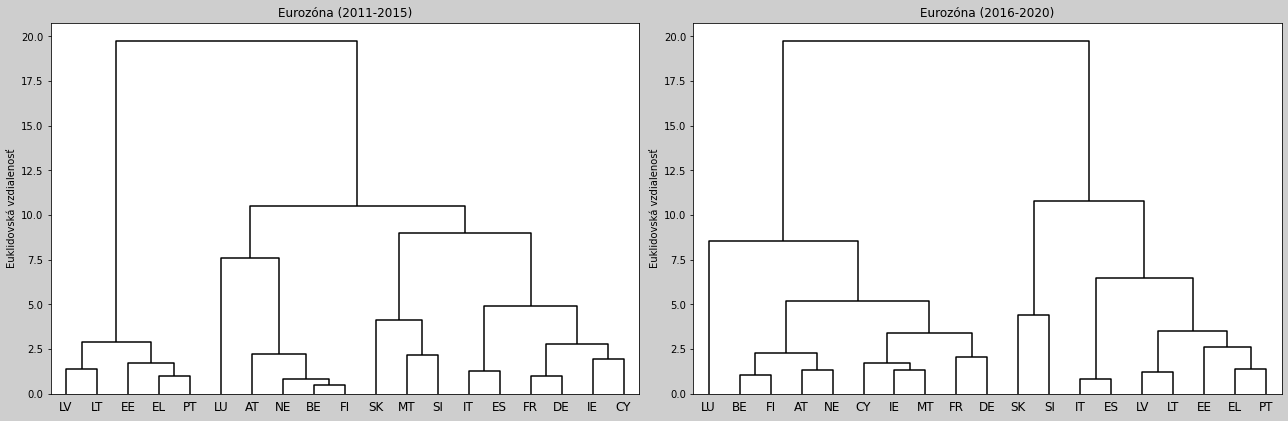

In [79]:
plt.figure(4, figsize=(18,6), facecolor='#cecece')

labelList = list(df_2011.index.map(mapper))

plt.subplot(1, 2, 1)
linked = linkage(df_2011, 'ward')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Eurozóna (2011-2015)')
plt.ylabel('Euklidovská vzdialenosť')

plt.subplot(1, 2, 2)
linked = linkage(df_2016, 'ward')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Eurozóna (2016-2020)')
plt.ylabel('Euklidovská vzdialenosť')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
# plt.suptitle('Original EU members over time 1980-1999 HAC analysis different methods', size='xx-large')
plt.savefig('EA_cluster_window_approach.png', facecolor='#cecece')
plt.show()

## Window perspective - 2004

In [80]:
df_cluster_2004 = df_cluster.loc[c_lib['2004'],:]

df_cluster_2004

income_1Q                                                        \
               2011     2012     2013     2014     2015     2016     2017   
Cyprus      13734.0  13612.0  12003.0  11141.0  10640.0  11323.0  11842.0   
Estonia      5137.0   5316.0   5845.0   5923.0   6777.0   7703.0   8070.0   
Latvia       4062.0   4030.0   4270.0   4710.0   5110.0   5947.0   5859.0   
Lithuania    4056.0   4512.0   4812.0   5138.0   5271.0   5988.0   6098.0   
Malta       10001.0  10282.0  10633.0  10909.0  11565.0  11964.0  12667.0   
Slovakia     6897.0   7287.0   7384.0   7583.0   7814.0   7934.0   7390.0   
Slovenia    10569.0  10774.0  10566.0  10681.0  11260.0  11345.0  11383.0   
Czechia      7864.0   8125.0   8574.0   8746.0   9102.0   9692.0   9824.0   
Hungary      5234.0   5586.0   5354.0   5492.0   5748.0   6031.0   6077.0   
Poland       5765.0   6057.0   6432.0   6719.0   6977.0   7591.0   8156.0   

                                     Income_2Q                             \
              2018     2019     2020      2011     2012     2013     2014   
Cyprus     12129.0  13111.0  13151.0   19162.0  19074.0  16978.0  15762.0   
Estonia     8481.0   9106.0   9291.0    7485.0   7891.0   8607.0   9241.0   
Latvia      6288.0   6973.0   7339.0    5944.0   6101.0   6446.0   7320.0   
Lithuania   6705.0   7496.0   8182.0    6068.0   6724.0   7282.0   7595.0   
Malta      12495.0  12848.0  13400.0   14029.0  14600.0  15249.0  15686.0   
Slovakia    7748.0   7934.0   7779.0    8975.0   9799.0   9572.0   9877.0   
Slovenia   11898.0  12592.0  12807.0   13940.0  14271.0  14212.0  14328.0   
Czechia    10221.0  10781.0  10914.0    9989.0  10313.0  10802.0  11091.0   
Hungary     6235.0   6898.0   7035.0    7135.0   7604.0   7277.0   7559.0   
Poland      8329.0   8885.0   9730.0    8322.0   8635.0   9158.0   9560.0   

                                                                income_3Q  \
              2015     2016     2017     2018     2019     2020      2011   
Cyprus     15313.0  16173.0  16877.0  17505.0  18590.0  18305.0   26389.0   
Estonia    10432.0  11867.0  12414.0  13378.0  14240.0  14331.0   10982.0   
Latvia      8092.0   9257.0   9248.0  10031.0  11031.0  11339.0    9180.0   
Lithuania   8251.0   9364.0   9819.0  10702.0  11509.0  12546.0    8926.0   
Malta      16753.0  17264.0  17899.0  17932.0  18588.0  18756.0   19364.0   
Slovakia   10220.0  10466.0   9605.0   9744.0  10503.0  10076.0   11978.0   
Slovenia   15102.0  15250.0  15245.0  15771.0  16633.0  16988.0   18076.0   
Czechia    11652.0  12478.0  12641.0  13264.0  14035.0  14151.0   13156.0   
Hungary     7919.0   8267.0   8332.0   8607.0   9360.0   9699.0    9671.0   
Poland      9950.0  10865.0  11079.0  11513.0  12335.0  13350.0   11666.0   

                                                                          \
              2012     2013     2014     2015     2016     2017     2018   
Cyprus     26860.0  24297.0  23061.0  22144.0  23397.0  23778.0  23813.0   
Estonia    12041.0  12985.0  14440.0  15923.0  18100.0  18446.0  19652.0   
Latvia      9278.0   9902.0  11142.0  12251.0  13862.0  14039.0  15060.0   
Lithuania  10130.0  10647.0  11591.0  12965.0  14362.0  14805.0  16184.0   
Malta      19656.0  20575.0  21361.0  22891.0  23955.0  24416.0  24515.0   
Slovakia   13106.0  12662.0  12935.0  13108.0  13394.0  12016.0  12585.0   
Slovenia   18459.0  18410.0  18692.0  19402.0  19673.0  19776.0  20248.0   
Czechia    13432.0  14195.0  14397.0  15272.0  16350.0  16595.0  17361.0   
Hungary    10140.0   9840.0  10191.0  10953.0  11364.0  11380.0  11637.0   
Poland     12304.0  12918.0  13426.0  13856.0  15195.0  15247.0  15574.0   

                             gini                                            \
              2019     2020  2010  2011  2012  2013  2014  2015  2016  2017   
Cyprus     25355.0  25120.0  30.1  29.2  31.0  32.4  34.8  33.6  32.1  30.8   
Estonia    20541.0  20469.0  31.3  31.9  32.5  32.9  35.6  34.8  32.7  31.6   
Latvia

In [81]:
df_cluster_2011 = df_cluster_2004.loc[:,pd.IndexSlice[:, ['2011','2012','2013','2014','2015']]]
df_cluster_2016 = df_cluster_2004.loc[:,pd.IndexSlice[:, ['2016','2017','2018','2019','2020']]]

df_cluster_norm_2011 =(df_cluster_2011 - df_cluster_2011.mean())/df_cluster_2011.std()
df_cluster_norm_2016 =(df_cluster_2016 - df_cluster_2016.mean())/df_cluster_2016.std()

In [82]:
df_2011 = df_cluster_norm_2011.copy()
df_2011.columns = df_2011.columns.map('_'.join).str.strip('|')

df_2016 = df_cluster_norm_2016.copy()
df_2016.columns = df_2016.columns.map('_'.join).str.strip('|')

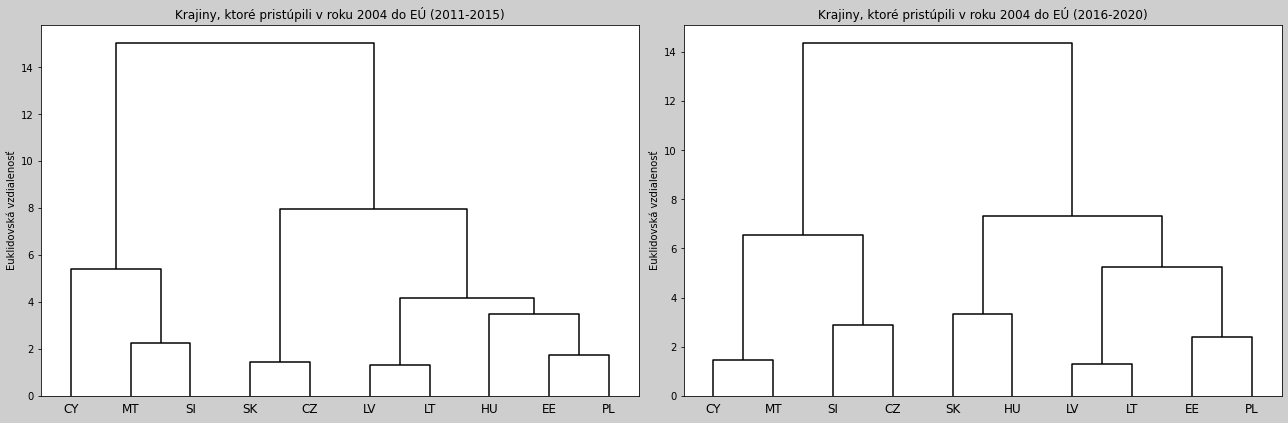

In [83]:
plt.figure(4, figsize=(18,6), facecolor='#cecece')

labelList = list(df_2011.index.map(mapper))

plt.subplot(1, 2, 1)
linked = linkage(df_2011, 'ward')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Krajiny, ktoré pristúpili v roku 2004 do EÚ (2011-2015)')
plt.ylabel('Euklidovská vzdialenosť')

plt.subplot(1, 2, 2)
linked = linkage(df_2016, 'ward')
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True,
           color_threshold=0, above_threshold_color='k')
plt.title('Krajiny, ktoré pristúpili v roku 2004 do EÚ (2016-2020)')
plt.ylabel('Euklidovská vzdialenosť')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
# plt.suptitle('Original EU members over time 1980-1999 HAC analysis different methods', size='xx-large')
plt.savefig('2004_cluster_window_approach.png', facecolor='#cecece')
plt.show()